In [1]:
import os
import math
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit

In [7]:
## Bulk Correlation ##
## average raw data ##
BC = 'PBC'
Ls = [32, 64]
Jdis = ['Jdis10', 'Jdis05']
N = 100  #arr = ['1','2','3','4','5'...]

for j in range(len(Jdis)):
    delta = Jdis[j]

    for i in range(len(Ls)):
        L = Ls[i]
        arr = []  

        for i in range(N):
            n = str(87+i)
            arr.append(n)

        for i in range(len(arr)):
            num = arr[i] 
            myfile = '/home/liusf/tSDRG/Main/data/'+ BC +'/'+ delta +'/L'+ str(L) +'_P10_m30_'+ num + '/L'+ str(L) +'_P10_m30_'+ num +'_corr1.csv'
            df = pd.read_csv(myfile)  
            dfr = df['x2'] - df['x1']
            DataColle = {'x2-x1': dfr}
            dfR = pd.DataFrame(DataColle, columns=['x2-x1'])

            if(i == 0):
                dftc = df['corr']
            dfc = df['corr']

            if(i != 0):
                dftc += dfc

        for j in range(len(dftc)):
                dftc[j] = pow(-1,dfr[j])*dftc[j]  

        dfavc = dftc/N
        dfavc = pd.concat([dfR,dfavc],axis=1)

        direc = '/home/liusf/test/'+ delta
        path = direc +'/'+ BC +'_L'+ str(L) +'_P10_m30_corr1_N'+ str(N) +'.csv'
        if (os.path.exists(direc) == False):
            os.mkdir(direc)
        dfavc.to_csv(path,index=0)

Jdis10
Jdis05


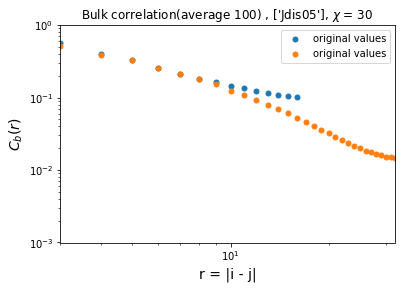

In [15]:
## average meta data ##
## plot it ##
BC = 'PBC'
Ls = [32, 64]
Jdis = ['Jdis05']
N = 100

for i in range(len(Ls)):
    dfM = pd.DataFrame(columns = ['x2-x1', 'corr'])
    direc = '/home/liusf/test/'+ Jdis[0]
    path = direc +'/'+ BC +'_L'+ str(Ls[i]) +'_P10_m30_corr1_N'+ str(N) + '_final' +'.csv'
    
    L = int(Ls[i]/2)
    myfile = '/home/liusf/test/'+ Jdis[0] +'/'+ BC +'_L'+ str(Ls[i]) +'_P10_m30_corr1_N'+ str(N) +'.csv'
    df = pd.read_csv(myfile)
    
    if (os.path.exists(direc) == False):
        os.mkdir(direc)
    
    for i in range(L):
        r = i+1
        dfsr = df.loc[df['x2-x1'] == r]
        mean = {'x2-x1':r ,'corr': dfsr['corr'].mean()}
        dfM.loc[i] = mean
    
    plt.plot(dfM['x2-x1'] ,dfM['corr'],".", markersize = 10, label = 'original values')
    dfM.to_csv(path,index=0)

plt.xlabel('r = |i - j|', fontsize=14)
plt.ylabel(r'$C_b(r)$', fontsize=14)
plt.xlim(3,32)
plt.ylim(0.001, 1)
plt.xscale('log')
plt.yscale('log')
plt.title(r'Bulk correlation(average %d) , %s, $\chi$ = 30' % (int(N), Jdis), fontsize=12)
plt.legend(loc = 'best')
#plt.savefig( BC +'_L32_P10_' + Jdis + '_m30_N' + str(N) +'.pdf', format='pdf', dpi=4000)
plt.show()

-0.8161473400947776
-0.9789045929700292


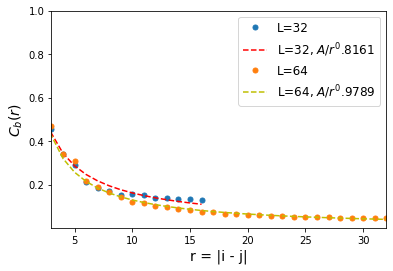

In [16]:
## fitting method 1 ##

BC = 'PBC'
Ls = [32, 64]
Jdis = ['Jdis10']
N = 100

for i in range(len(Ls)):
    L = int(Ls[i]/2)
    dfln = pd.DataFrame(columns = ['ln(x2-x1)', 'ln(corr)'])
    direc = '/home/liusf/test/'+ Jdis[0]
    path = direc +'/'+ BC +'_L'+ str(Ls[i]) +'_P10_m30_corr1_N'+ str(N) + '_final' +'.csv'
    df = pd.read_csv(path)
    plt.plot(df['x2-x1'], df['corr'], ".", markersize = 10, label = 'L=%d' %(Ls[i])) ## oringinal data curve
    
    for i in range(L):
        r = i+1
        ln = {'ln(x2-x1)':math.log(r) ,'ln(corr)':math.log(df['corr'][i])}
        dfln.loc[i] = ln
    a1 = np.polyfit(dfln['ln(x2-x1)'], dfln['ln(corr)'], 1)
    print(a1[0])
    yp = []
    for i in range(L):
        yp.append(df['x2-x1'][i]**a1[0]*math.exp(a1[1]))
    #print(len(yp))
    if(L == 16):
        plt.plot(df['x2-x1'], yp, "r--", label = 'L=32, $A/r^%1.4f$' %(abs(a1[0]))) ## fitting data curve
    else:
        plt.plot(df['x2-x1'], yp, "y--", label = 'L=64, $A/r^%1.4f$' %(abs(a1[0]))) ## fitting data curve
    
plt.xlabel('r = |i - j|', fontsize=14)
plt.ylabel(r'$C_b(r)$', fontsize=14)
plt.xlim(3,32)
plt.ylim(0.001, 1)
#plt.xscale('log')
#plt.yscale('log')
plt.legend(loc = 'best',fontsize=12)
#plt.savefig( '/home/liusf/test/'+ 'Fitting1_' + BC +'_P10'+ Jdis[0] +'_m30_N' + str(N) +'.pdf', format='pdf', dpi=4000)
plt.show()

x2-x1      corr
0   16.0  0.130076
[ 1.22221923 -0.91271243]
   x2-x1      corr
0   16.0  0.130076
1   32.0  0.048948
[ 1.23118223 -0.96164868]


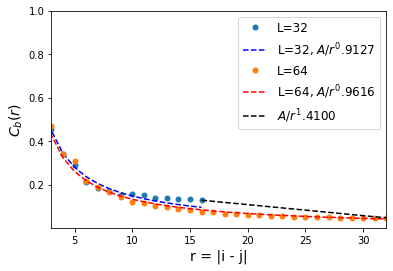

In [17]:
## fitting method 2 ##

BC = 'PBC'
Ls = [32, 64]
Jdis = ['Jdis10']
N = 100

def func(x, a, b): ## 定義 fitting 公式 (ax^b)
    return a*x**b

dftail = pd.DataFrame(columns = ['x2-x1', 'corr'])

for i in range(len(Ls)):
    L = int(Ls[i]/2)
    direc = '/home/liusf/test/'+ Jdis[0]
    path = direc +'/'+ BC +'_L'+ str(Ls[i]) +'_P10_m30_corr1_N'+ str(N) + '_final' +'.csv'
    df = pd.read_csv(path)
    
    tail = {'x2-x1':df['x2-x1'][L-1] ,'corr': df['corr'][L-1]} ## 取最後一個值
    dftail.loc[i] = tail
    print(dftail)
    
    plt.plot(df['x2-x1'], df['corr'], ".", markersize = 10, label = 'L=%d' %(Ls[i])) ## oringinal data curve   
    popt, pcov = curve_fit(func, df['x2-x1'], df['corr'])
    print(popt)
    a = popt[0]
    b = popt[1]
    yp = []
    for i in range(L):
        yp.append(func(df['x2-x1'][i], a ,b))
    
    if(L == 16):
        plt.plot(df['x2-x1'], yp, "b--", label = 'L=32, $A/r^%1.4f$' %(abs(b))) ## fitting data curve
    else:
        plt.plot(df['x2-x1'], yp, "r--", label = 'L=64, $A/r^%1.4f$' %(abs(b))) ## fitting data curve

popt1, pcov1 = curve_fit(func, dftail['x2-x1'], dftail['corr']) ## fitting 最後一個值 curve
c = popt1[0]
d = popt1[1]
yp = []
for i in range(len(Ls)):
    yp.append(func(dftail['x2-x1'][i], c ,d))
plt.plot(dftail['x2-x1'], yp, "k--", label = '$A/r^%1.4f$' %(abs(d))) ## fitting data curve

plt.xlabel('r = |i - j|', fontsize=14)
plt.ylabel(r'$C_b(r)$', fontsize=14)
plt.xlim(3,32)
plt.ylim(0.001, 1)
#plt.xscale('log')
#plt.yscale('log')
plt.legend(loc = 'best',fontsize=12)
plt.show()

In [18]:
## String Order Parameter ##
## average raw data ##
BC = 'PBC'
Ls = [32, 64, 128]
Jdis = ['Jdis08', 'Jdis09', 'Jdis10', 'Jdis11', 'Jdis12']
N = 100  

for j in range(len(Jdis)):
    delta = Jdis[j]

    for i in range(len(Ls)):
        L = Ls[i]
        arr = []  

        for i in range(N):
            n = str(87+i)
            arr.append(n)

        for i in range(len(arr)):
            num = arr[i] 
            myfile = 'home/liusf/tSDRG/Main/data/'+ BC +'/'+ delta +'/L'+ str(L) +'_P10_m30_'+ num + '/L'+ str(L) +'_P10_m30_'+ num +'_string.csv'
            df = pd.read_csv(myfile)  
            dfr = df['x2'] - df['x1']
            DataColle = {'x2-x1': dfr}
            dfR = pd.DataFrame(DataColle, columns=['x2-x1'])

            if(i == 0):
                dftc = df['corr']
            dfc = df['corr']

            if(i != 0):
                dftc += dfc

        dfavc = dftc/N
        dfavc = pd.concat([dfR,dfavc],axis=1)

        direc = '/home/liusf/test/'+ delta
        path = direc +'/'+ BC +'_L'+ str(L) +'_P10_m30_string_N'+ str(N) +'.csv'
        if (os.path.exists(direc) == False):
            os.mkdir(direc)
        dfavc.to_csv(path,index=0)

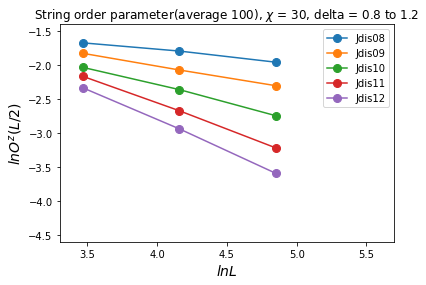

In [8]:
## plot it ##
BC = 'PBC'
Ls = [32, 64, 128]
Jdis = ['Jdis08', 'Jdis09', 'Jdis10', 'Jdis11', 'Jdis12']
N = 100

for j in range(len(Jdis)):
    delta = Jdis[j]
    dfstr = pd.DataFrame(columns = ['ln(L)', 'ln(O^z)'])
    
    for i in range(len(Ls)):
        myfile = '/home/liusf/test/'+ delta +'/'+ BC +'_L'+ str(Ls[i]) +'_P10_m30_string_N'+ str(N) +'.csv'
        df = pd.read_csv(myfile)
        mean = {'ln(L)':math.log(Ls[i]) ,'ln(O^z)': math.log(df['corr'].mean())}
        dfstr.loc[i] = mean

    plt.plot(dfstr['ln(L)'] ,dfstr['ln(O^z)'], "o-", markersize = 8, label = delta)
    #plt.plot(dfstr['ln(L)'] ,dfstr['ln(O^z)'])
plt.xlabel(r'$lnL$', fontsize=14)
plt.ylabel(r'$lnO^z(L/2)$', fontsize=14)
plt.xlim(3.3,5.7)
plt.ylim(-4.6, -1.4)
#plt.xscale('log')
#plt.yscale('log')
plt.title(r'String order parameter(average %d), $\chi$ = 30, delta = 0.8 to 1.2' % (int(N)), fontsize=12)
plt.legend(loc = 'best')
plt.savefig( '/home/liusf/test/'+ BC +'_P10_m30_string_N' + str(N) +'.pdf', format='pdf', dpi=4000)
plt.show()

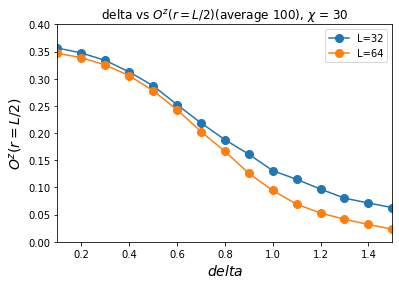

In [32]:
## String Order Parameter ##
## plot delta vs O^z ##
BC = 'PBC'
Ls = [32, 64]
Jdis = ['Jdis01','Jdis02','Jdis03','Jdis04','Jdis05','Jdis06','Jdis07','Jdis08','Jdis09','Jdis10','Jdis11','Jdis12','Jdis13','Jdis14','Jdis15']
N = 100  

arr = []
for j in range(N):
    n = str(87+j)
    arr.append(n)

for i in range(len(Ls)):
    L = Ls[i]
    dfstr = pd.DataFrame(columns = ['delta', 'O^z'])
    
    for d in range(len(Jdis)):
        J = Jdis[d]
        delta = Jdis[d][4] + '.' + Jdis[d][5]
        D = float(delta)
        
        for k in range(len(arr)):
            num = arr[k] 
            myfile = '/home/liusf/tSDRG/Main/data/'+ BC +'/'+ J +'/L'+ str(L) +'_P10_m30_'+ num + '/L'+ str(L) +'_P10_m30_'+ num +'_string.csv'
            df = pd.read_csv(myfile)  
            if(k == 0):
                dftc = df['corr']
            dfc = df['corr']

            if(k != 0):
                dftc += dfc

        dfavc = dftc/N                          ## first average(N times)
        mean = {'delta':D ,'O^z':dfavc.mean()}  ## second average(L/2 times)
        dfstr.loc[d] = mean                     ## total average times = N * L/2

    plt.plot(dfstr['delta'] ,dfstr['O^z'],"o-", markersize = 8, label = 'L=%d' %(L))
    #plt.plot(dfstr['delta'] ,dfstr['O^z'], color = 'b')

plt.xlabel(r'$delta$', fontsize=14)
plt.ylabel(r'$O^z(r=L/2)$', fontsize=14)
plt.xlim(0.1,1.5)
plt.ylim(0, 0.4)
#plt.xscale('log')
#plt.yscale('log')
plt.title(r'delta vs $O^z(r=L/2)$(average %d), $\chi$ = 30' % (int(N)), fontsize=12)
plt.legend(loc = 'best',fontsize=12)
plt.savefig( BC + '_P10_m30_N' + str(N) +'_Oz-delta.pdf', format='pdf', dpi=4000)
plt.show()

In [6]:
## Distribution of End to end correlations ##
BC = 'OBC'
Ls = [32, 48, 64, 96]
Jdis = ['Jdis10']
m = 30
N = 10  #arr = ['1','2','3','4','5'...]

for j in range(len(Jdis)):
    delta = Jdis[j]

    for i in range(len(Ls)):
        L = Ls[i]
        arr = []  

        for i in range(N):
            n = str(1+i)
            arr.append(n)

        for i in range(len(arr)):
            num = arr[i] 
            myfile = '/home/liusf/tSDRG/Main/data/'+ BC +'/'+ delta +'/L'+ str(L) +'_P10_m'+ str(m) +'_'+ num + '/L'+ str(L) +'_P10_m'+ str(m) +'_'+ num +'_corr1.csv'
            df = pd.read_csv(myfile)  
            #dfr = df['x2'] - df['x1']
            #DataColle = {'x2-x1': dfr}
            #dfR = pd.DataFrame(DataColle, columns=['x2-x1'])

            if(i == 0):
                dftc = df['corr']
            dfc = df['corr']
            #print(dfc)
            if(i != 0):
                dftc += dfc
                

        for j in range(len(dftc)):
                dftc[j] = abs(dftc[j])  

        dfavc = dftc/N
        #print(dftc)
        print(-math.log(dfavc))

0.8458409315127396
1.0482924962226197
0.9765921647843604
1.4364621406176385


In [8]:
#scp -r liusf@allegro.phys.nthu.edu.tw:/home/liusf/tSDRG/Main/data/* ./

In [31]:
myfile = '/home/liusf/tSDRG_Results/spin_1_random_chian/Distribution_end_to_end_correlation/raw_data/OBC/Jdis10/L32_P10_m30_sum10000_corr2.csv'
df = pd.read_csv(myfile)
cl = df['corr'][].mean()
print(cl)
print(-math.log(cl))

0.3755643530214315
0.9793254429106627
